In [14]:
import numpy as np

In [1]:
DIR = './datasets/ravdess/'
DIR2 = './datasets/toronto/'

In [10]:
from features_utils import features_extraction
from dataset_utils import Dataset

d = Dataset(DIR, features_extraction)
categories = d.get_categories()
dataset = d.get_dataset()

dataset.shape

(1248, 53)

In [11]:
categories

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

In [12]:
d.save_to_csv('dataset_ravdess.csv')

In [13]:
X_ravdess = dataset[:,:-1]
y_ravdess = dataset[:,-1]

In [6]:
d = Dataset(DIR2, features_extraction)
categories = d.get_categories()
dataset = d.get_dataset()

dataset.shape

(2800, 53)

In [7]:
categories

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

In [8]:
d.save_to_csv('dataset_toronto.csv')

In [9]:
X_toronto = dataset[:,:-1]
y_toronto = dataset[:,-1]

In [19]:
toronto = np.genfromtxt('dataset_toronto.csv', delimiter=',')

In [22]:
ravdess = np.genfromtxt('dataset_ravdess.csv', delimiter=',')

In [23]:
ravdess.shape

(1248, 53)

In [24]:
from sklearn.model_selection import train_test_split

toronto_train, toronto_test = train_test_split(toronto, test_size=0.3)

In [28]:
ravdess_train, ravdess_test = train_test_split(ravdess, test_size=0.3)

In [33]:
train = np.concatenate((toronto_train, ravdess_train))

In [45]:
test = np.concatenate((toronto_test, ravdess_test))

In [46]:
np.random.shuffle(test)
np.random.shuffle(train)

In [37]:
X_train = train[:,:-1]
y_train = train[:,-1]

In [47]:
X_test = test[:,:-1]
y_test = test[:,-1]

In [38]:
X_test_toronto = toronto_test[:,:-1]
y_test_toronto = toronto_test[:,-1]

In [39]:
X_test_ravdess = ravdess_test[:,:-1]
y_test_ravdess = ravdess_test[:,-1]

In [41]:
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['poly'], 'degree':[1, 5]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [48]:
clf.score(X_test, y_test)

0.8534979423868313

In [49]:
clf.score(X_test_toronto, y_test_toronto)

0.96309523809523812

In [44]:
clf.score(X_test_ravdess, y_test_ravdess)

0.60799999999999998

In [51]:
y_pred = clf.predict(X_test)
y_pred_toronto = clf.predict(X_test_toronto)
y_pred_ravdess = clf.predict(X_test_ravdess)

In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(clf, X, y, cv=10)
# scores

In [ ]:
from sklearn.metrics import confusion_matrix

y_predict = clf.predict(X_test)
c_matrix = confusion_matrix(y_test, y_predict)
c_matrix

In [53]:
from sklearn.metrics import confusion_matrix

In [ ]:
print([c_matrix[i,i]/c_matrix[i].sum() for i in range(c_matrix.shape[0])])

In [56]:
from plot_confusion_matrix import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
cnf_matrix = confusion_matrix(y_test_toronto, y_pred_toronto)

Normalized confusion matrix
[[ 0.95  0.02  0.    0.01  0.01  0.01  0.01]
 [ 0.06  0.84  0.03  0.02  0.02  0.01  0.01]
 [ 0.02  0.03  0.87  0.02  0.    0.02  0.05]
 [ 0.03  0.02  0.04  0.81  0.    0.01  0.09]
 [ 0.01  0.04  0.01  0.01  0.9   0.03  0.01]
 [ 0.01  0.03  0.04  0.03  0.05  0.83  0.02]
 [ 0.05  0.02  0.07  0.05  0.02  0.01  0.79]]


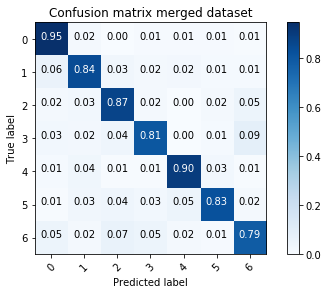

In [59]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories, normalize=True,
                      title='Confusion matrix merged dataset')

Normalized confusion matrix
[[ 0.98  0.01  0.    0.01  0.    0.    0.01]
 [ 0.    0.96  0.    0.01  0.01  0.02  0.  ]
 [ 0.    0.    0.98  0.01  0.    0.    0.02]
 [ 0.02  0.    0.01  0.92  0.    0.01  0.05]
 [ 0.    0.03  0.    0.    0.97  0.    0.  ]
 [ 0.    0.01  0.    0.    0.    0.99  0.  ]
 [ 0.    0.    0.01  0.05  0.    0.    0.94]]


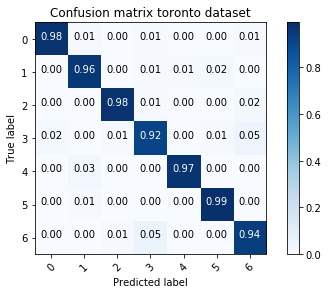

In [68]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories, normalize=True,
                      title='Confusion matrix toronto dataset')

Normalized confusion matrix
[[ 0.88  0.03  0.    0.02  0.03  0.03  0.  ]
 [ 0.17  0.63  0.08  0.03  0.05  0.    0.03]
 [ 0.05  0.09  0.62  0.05  0.    0.05  0.12]
 [ 0.06  0.08  0.12  0.54  0.    0.02  0.18]
 [ 0.08  0.08  0.04  0.04  0.58  0.15  0.04]
 [ 0.02  0.08  0.13  0.08  0.15  0.48  0.05]
 [ 0.14  0.06  0.17  0.05  0.05  0.03  0.5 ]]


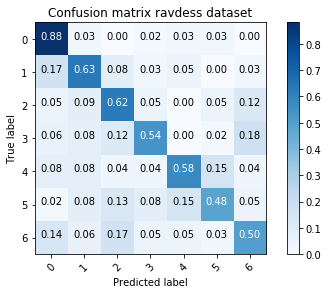

In [66]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories, normalize=True,
                      title='Confusion matrix ravdess dataset')